In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

nx,ny=64,64#146

features=np.load('features16384.npy')[:nx,60:60+ny,:]

X = np.reshape(features, (nx*ny,16384))

connectivity = grid_to_graph(n_x=128, n_y=128)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=2048)#,linkage='complete')

agglo.fit(X)
FA_spatial=agglo.transform(X)
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))

Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3


In [12]:
from sklearn.decomposition import PCA

n_pca=256
pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(FA_spatial)#components_



(4096,)


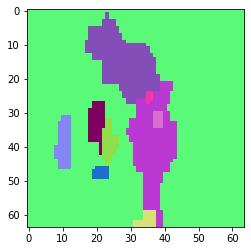

In [21]:
from sklearn import metrics


n_clusters_=10
sx,sy=64,64
connectivity = grid_to_graph(n_x=sx, n_y=sy)


ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)

labels = ward.labels_
print(labels.shape)
grains=labels.reshape((sx,sy))
colors=np.random.uniform(size=(n_clusters_,3))
sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
sample_silhouette_values=sample_silhouette_values.reshape((sx,sy))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(sx):
    for j in range(sy):
        if sample_silhouette_values[i,j] > 0:
            im[i,j]=colors[grains[i,j]]
        else:
            im[i,j]=colors[grains[i,j]]#np.array([1.,1.,1.])
plt.imshow(im)